In [81]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import random
import time
import pickle
import sys
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

%matplotlib inline
sys.setrecursionlimit(50000)

In [58]:
df_movies = pd.read_csv('Movies_List_v4.csv')
df_movies.head()

,Release Link,Title,Domestic Gross,Max Theatres,Opening Weekend Gross,Domestic to Opening Gross,Opening Weekend Theatres,Release Date,Studio Link,Studio Name,Title ID,Running Length,Budget,MPAA,Genre,Franchise,Brand,Year,Big_Studio,Release_Season
0,https://www.boxofficemojo.com//release/rl15158...,Iron Man 2,312433331,4390,128122480,0.410,4380,2010-05-07,https://pro.imdb.com/company/co0023400/boxoffi...,Paramount Pictures,tt1228705,124.0,200000000.0,['PG-13'],"['Action', 'Adventure', 'Sci-Fi']",1.0,1.0,2010,1,2
1,https://www.boxofficemojo.com//release/rl12485...,Harry Potter and the Deathly Hallows: Part 1,295983305,4125,125017372,0.422,4125,2010-11-19,https://pro.imdb.com/company/co0002663/boxoffi...,Warner Bros.,tt0926084,146.0,225000000.0,['PG-13'],"['Adventure', 'Family', 'Fantasy', 'Mystery']",1.0,0.0,2010,1,2
2,https://www.boxofficemojo.com//release/rl33932...,Alice in Wonderland,334191110,3739,116101023,0.347,3728,2010-03-05,https://pro.imdb.com/company/co0226183/boxoffi...,Walt Disney Studios Motion Pictures,tt1014759,108.0,200000000.0,['PG'],"['Adventure', 'Family', 'Fantasy']",1.0,1.0,2010,1,1
3,https://www.boxofficemojo.com//release/rl13835...,Toy Story 3,415004880,4028,110307189,0.266,4028,2010-06-18,https://pro.imdb.com/company/co0226183/boxoffi...,Walt Disney Studios Motion Pictures,tt0435761,103.0,200000000.0,NaN,"['Adventure', 'Animation', 'Comedy', 'Family',...",1.0,1.0,2010,1,2
4,https://www.boxofficemojo.com//release/rl57771...,Shrek Forever After,238736787,4386,70838207,0.297,4359,2010-05-21,https://pro.imdb.com/company/co0040938/boxoffi...,DreamWorks,tt0892791,93.0,165000000.0,['PG'],"['Adventure', 'Animation', 'Comedy', 'Family',...",1.0,1.0,2010,0,2


In [59]:
df_movies.loc[df_movies['Opening Weekend Theatres'] == '-','Opening Weekend Theatres'] = np.nan
df_movies.loc[df_movies['Opening Weekend Theatres'] == '-','Opening Weekend Theatres']

Series([], Name: Opening Weekend Theatres, dtype: object)

In [63]:
df_movies['Opening Weekend Theatres'] = df_movies['Opening Weekend Theatres'].astype('float64')
df_movies.dtypes

Release Link                  object
Title                         object
Domestic Gross                 int64
Max Theatres                  object
Opening Weekend Gross          int64
Domestic to Opening Gross    float64
Opening Weekend Theatres     float64
Release Date                  object
Studio Link                   object
Studio Name                   object
Title ID                      object
Running Length               float64
Budget                       float64
MPAA                          object
Genre                         object
Franchise                    float64
Brand                        float64
Year                           int64
Big_Studio                     int64
Release_Season                 int64
dtype: object

In [76]:
null_values_mask = ~((df_movies.Budget.isna()) | (df_movies['Opening Weekend Theatres'].isna()))


df_for_model = df_movies[null_values_mask].reset_index(drop=True)
df_for_model.shape

(2028, 20)

In [77]:
features_list = ['Opening Weekend Theatres','Budget','Franchise','Brand','Big_Studio','Release_Season']
target = 'Opening Weekend Gross'


X = df_for_model[features_list]
y = df_for_model[target]
# df_movies.reset_index()

In [78]:
X

,Opening Weekend Theatres,Budget,Franchise,Brand,Big_Studio,Release_Season
0,4380.0,200000000.0,1.0,1.0,1,2
1,4125.0,225000000.0,1.0,0.0,1,2
2,3728.0,200000000.0,1.0,1.0,1,1
3,4028.0,200000000.0,1.0,1.0,1,2
4,4359.0,165000000.0,1.0,1.0,0,2
...,...,...,...,...,...,...
2023,679.0,1700000.0,0.0,0.0,0,2
2024,17.0,6200000.0,0.0,0.0,0,0
2025,681.0,13000000.0,1.0,0.0,0,2
2026,4.0,11000000.0,0.0,0.0,0,0


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=14)
X_train.shape

(1622, 6)

In [87]:
lr_model = LR()
lr_model.fit(X_train,y_train)

print("Train Score: {}".format(lr_model.score(X_train,y_train)))
print("Test Score: {}".format(lr_model.score(X_test,y_test)))


Train Score: 0.6421347964590134
Test Score: 0.5985630471743131


<AxesSubplot:>

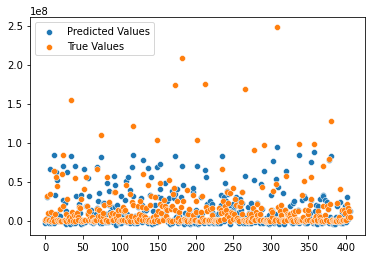

In [99]:
y_test_pred = lr_model.predict(X_test)

plt.plot(figsize=(10,10))
sns.scatterplot(data=y_test_pred,label="Predicted Values")
sns.scatterplot(data=np.array(y_test),label="True Values")

# y_test

In [97]:
y_test.describe()

count    4.060000e+02
mean     1.501203e+07
std      2.983710e+07
min      8.600000e+01
25%      5.707275e+04
50%      4.515057e+06
75%      1.621184e+07
max      2.479667e+08
Name: Opening Weekend Gross, dtype: float64